### LIFE EXPECTANCY DETERMINANTS: AN EXPLORATORY DATA ANALYSIS AND ML APPROACH

In [175]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [177]:
# Loading data
df=pd.read_csv("Life Expectancy Data.csv");
df.head()

,Country,Year,Status,life_expectancy,adult_mortality,infant_deaths,Alcohol,expenditure,Hepatitis_B,Measles,...,Polio,total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness(1-19 years),thinness(5-9 years),Income_composition,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [178]:
print(df.columns.tolist())

['Country', 'Year', 'Status', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'Alcohol', 'expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under_five_deaths', 'Polio', 'total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness(1-19 years)', 'thinness(5-9 years)', 'Income_composition', 'Schooling']


In [179]:
df.isnull().sum()

Country                   0
Year                      0
Status                    0
life_expectancy          10
adult_mortality          10
infant_deaths             0
Alcohol                 194
expenditure               0
Hepatitis_B             553
Measles                   0
BMI                      34
under_five_deaths         0
Polio                    19
total_expenditure       226
Diphtheria               19
HIV/AIDS                  0
GDP                     448
Population              652
thinness(1-19 years)     34
thinness(5-9 years)      34
Income_composition      167
Schooling               163
dtype: int64

In [180]:
for cols in df.columns:
    if df[cols].isnull().sum()>=0:
        print(cols)

Country
Year
Status
life_expectancy
adult_mortality
infant_deaths
Alcohol
expenditure
Hepatitis_B
Measles
BMI
under_five_deaths
Polio
total_expenditure
Diphtheria
HIV/AIDS
GDP
Population
thinness(1-19 years)
thinness(5-9 years)
Income_composition
Schooling


In [181]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean',
fill_value=None)
for cols in df.columns:
    if df[cols].isnull().sum()>0:
        df[cols] = imputer.fit_transform(df[[cols]])

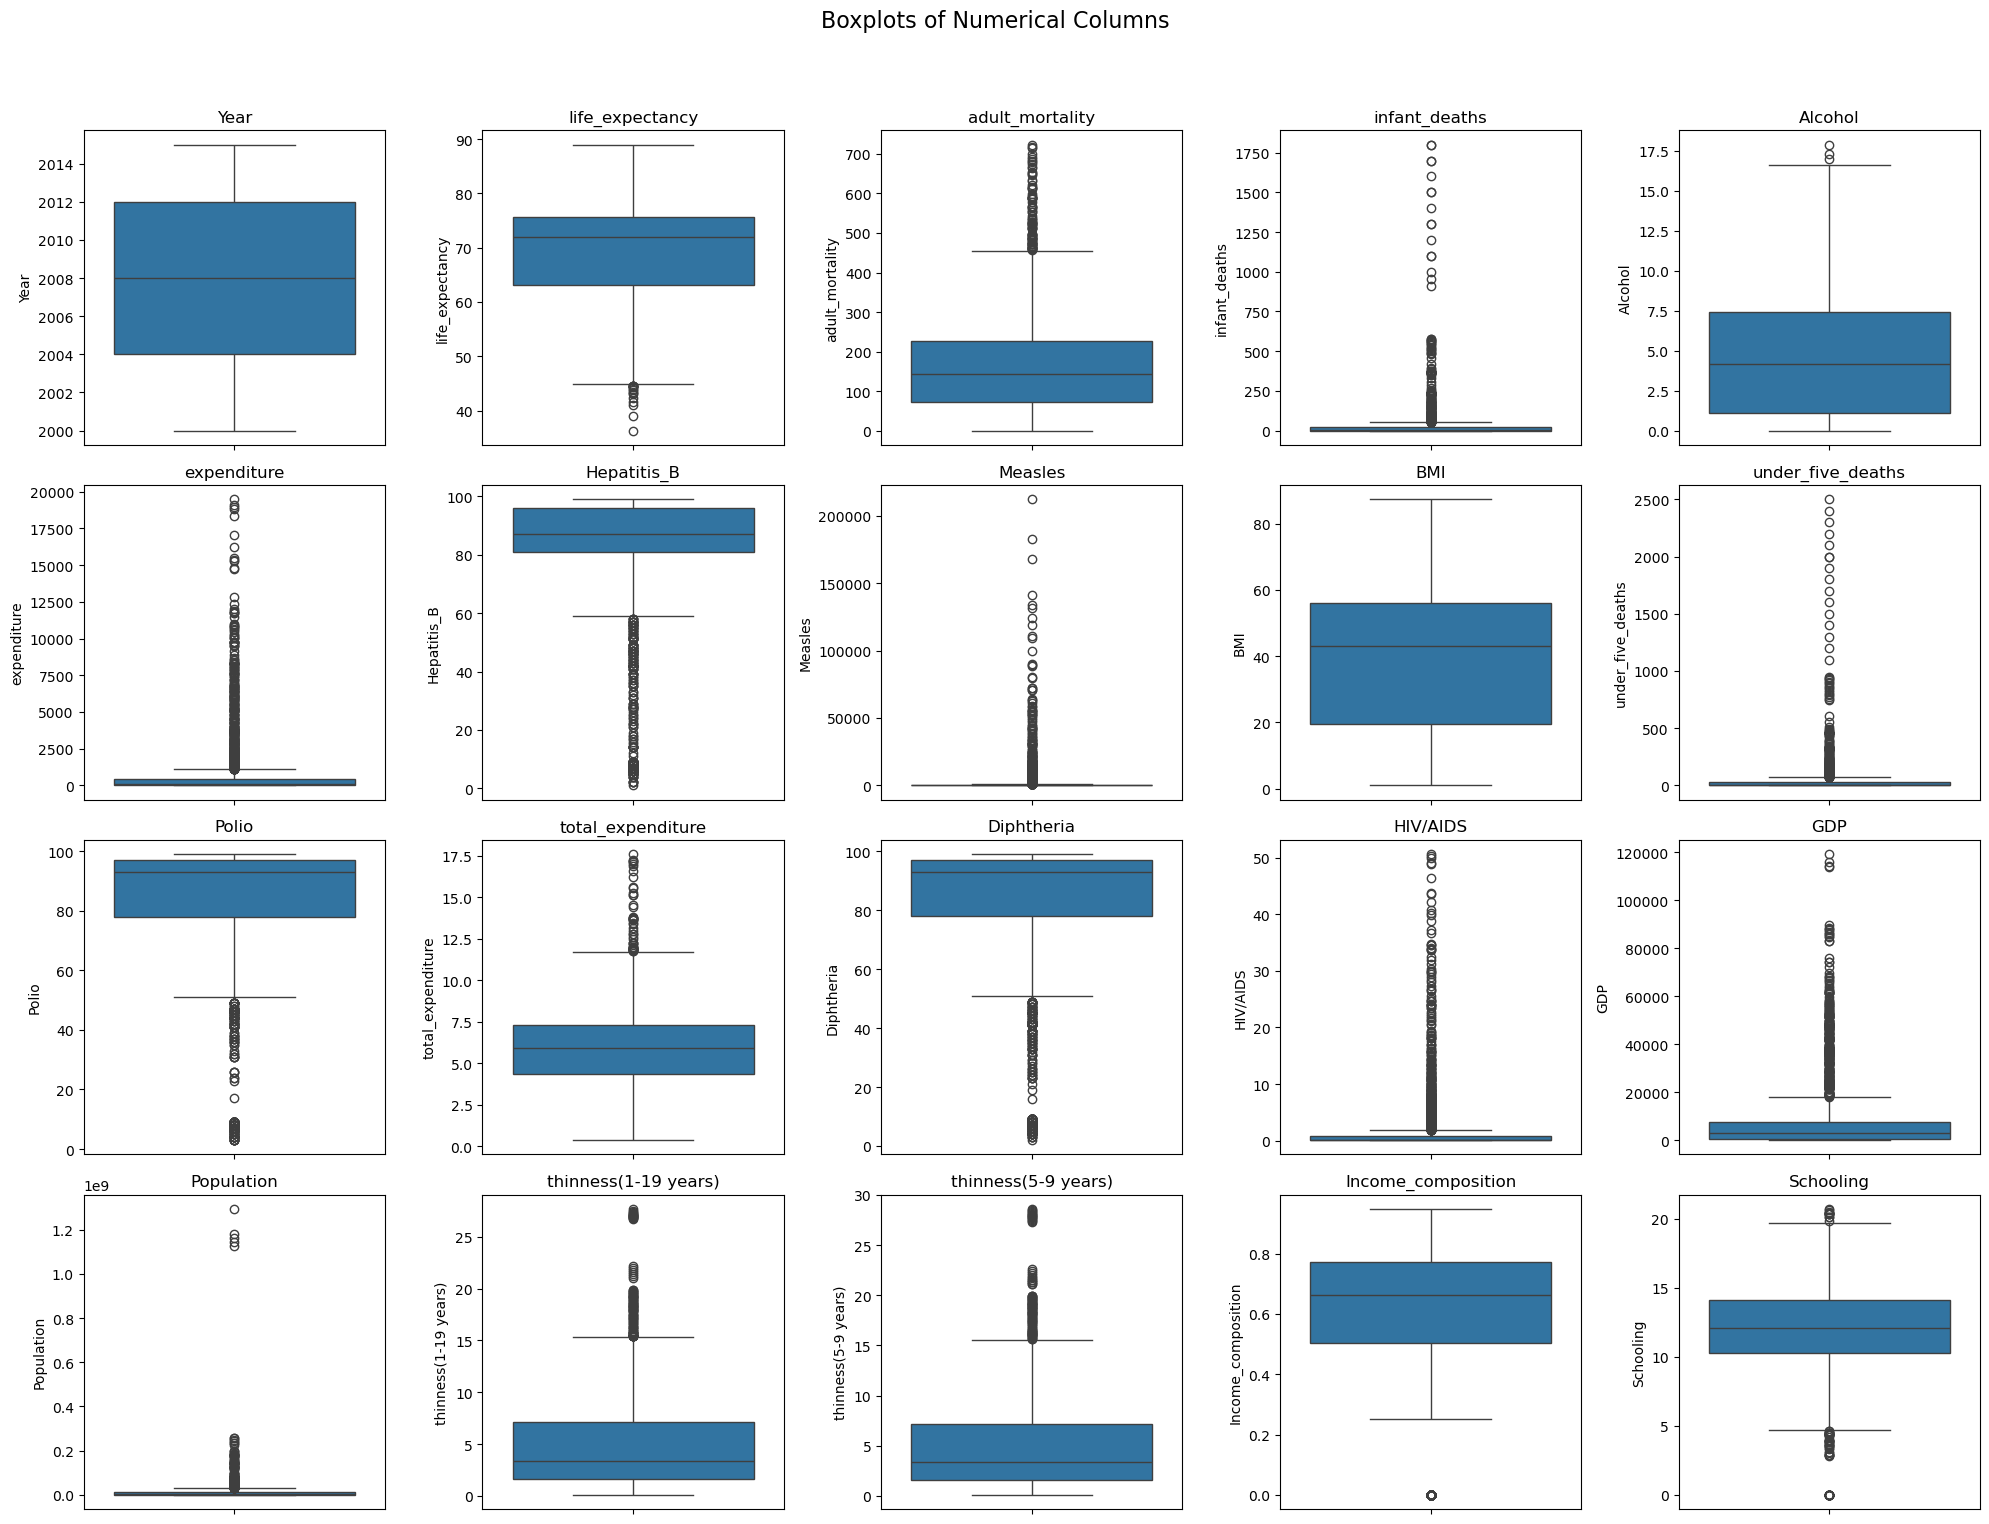

In [182]:
# Select only numerical columns (Checking Outliers)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)
axes = axes.flatten()

# Plot boxplots
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)  

# Remove unused axes
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j]) 

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [183]:
# Specify the list of columns you want to handle outliers for
outlier_cols = [
'adult_mortality', 'infant_deaths', 'Alcohol', 'expenditure',
'Hepatitis_B', 'Measles', 'BMI', 'under_five_deaths',
'Polio',
'total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
'Population',
'thinness(1-19 years)', 'thinness(5-9 years)',
'Income_composition', 'Schooling'
]
outlier_cols

['adult_mortality',
 'infant_deaths',
 'Alcohol',
 'expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'under_five_deaths',
 'Polio',
 'total_expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness(1-19 years)',
 'thinness(5-9 years)',
 'Income_composition',
 'Schooling']

In [184]:
# Perform outlier handling for each specified column
for col_name in outlier_cols:
    col_name = col_name.strip()  # remove any leading/trailing spaces

    # Check if column exists
    if col_name in df.columns:
        # Calculate quartiles and IQR
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        print(f"Column: {col_name}")
        print(f"  Q1: {q1}")
        print(f"  Q3: {q3}")
        print(f"  IQR: {iqr}")
        print(f"  Lower Bound: {lower_bound}")
        print(f"  Upper Bound: {upper_bound}\n")

Column: adult_mortality
  Q1: 74.0
  Q3: 227.0
  IQR: 153.0
  Lower Bound: -155.5
  Upper Bound: 456.5

Column: infant_deaths
  Q1: 0.0
  Q3: 22.0
  IQR: 22.0
  Lower Bound: -33.0
  Upper Bound: 55.0

Column: Alcohol
  Q1: 1.0925
  Q3: 7.39
  IQR: 6.297499999999999
  Lower Bound: -8.35375
  Upper Bound: 16.83625

Column: expenditure
  Q1: 4.68534258525
  Q3: 441.53414435
  IQR: 436.84880176475
  Lower Bound: -650.587860061875
  Upper Bound: 1096.807346997125

Column: Hepatitis_B
  Q1: 80.94046121593291
  Q3: 96.0
  IQR: 15.059538784067087
  Lower Bound: 58.35115303983228
  Upper Bound: 118.58930817610063

Column: Measles
  Q1: 0.0
  Q3: 360.25
  IQR: 360.25
  Lower Bound: -540.375
  Upper Bound: 900.625

Column: BMI
  Q1: 19.4
  Q3: 56.1
  IQR: 36.7
  Lower Bound: -35.650000000000006
  Upper Bound: 111.15

Column: under_five_deaths
  Q1: 0.0
  Q3: 28.0
  IQR: 28.0
  Lower Bound: -42.0
  Upper Bound: 70.0

Column: Polio
  Q1: 78.0
  Q3: 97.0
  IQR: 19.0
  Lower Bound: 49.5
  Upper Bound

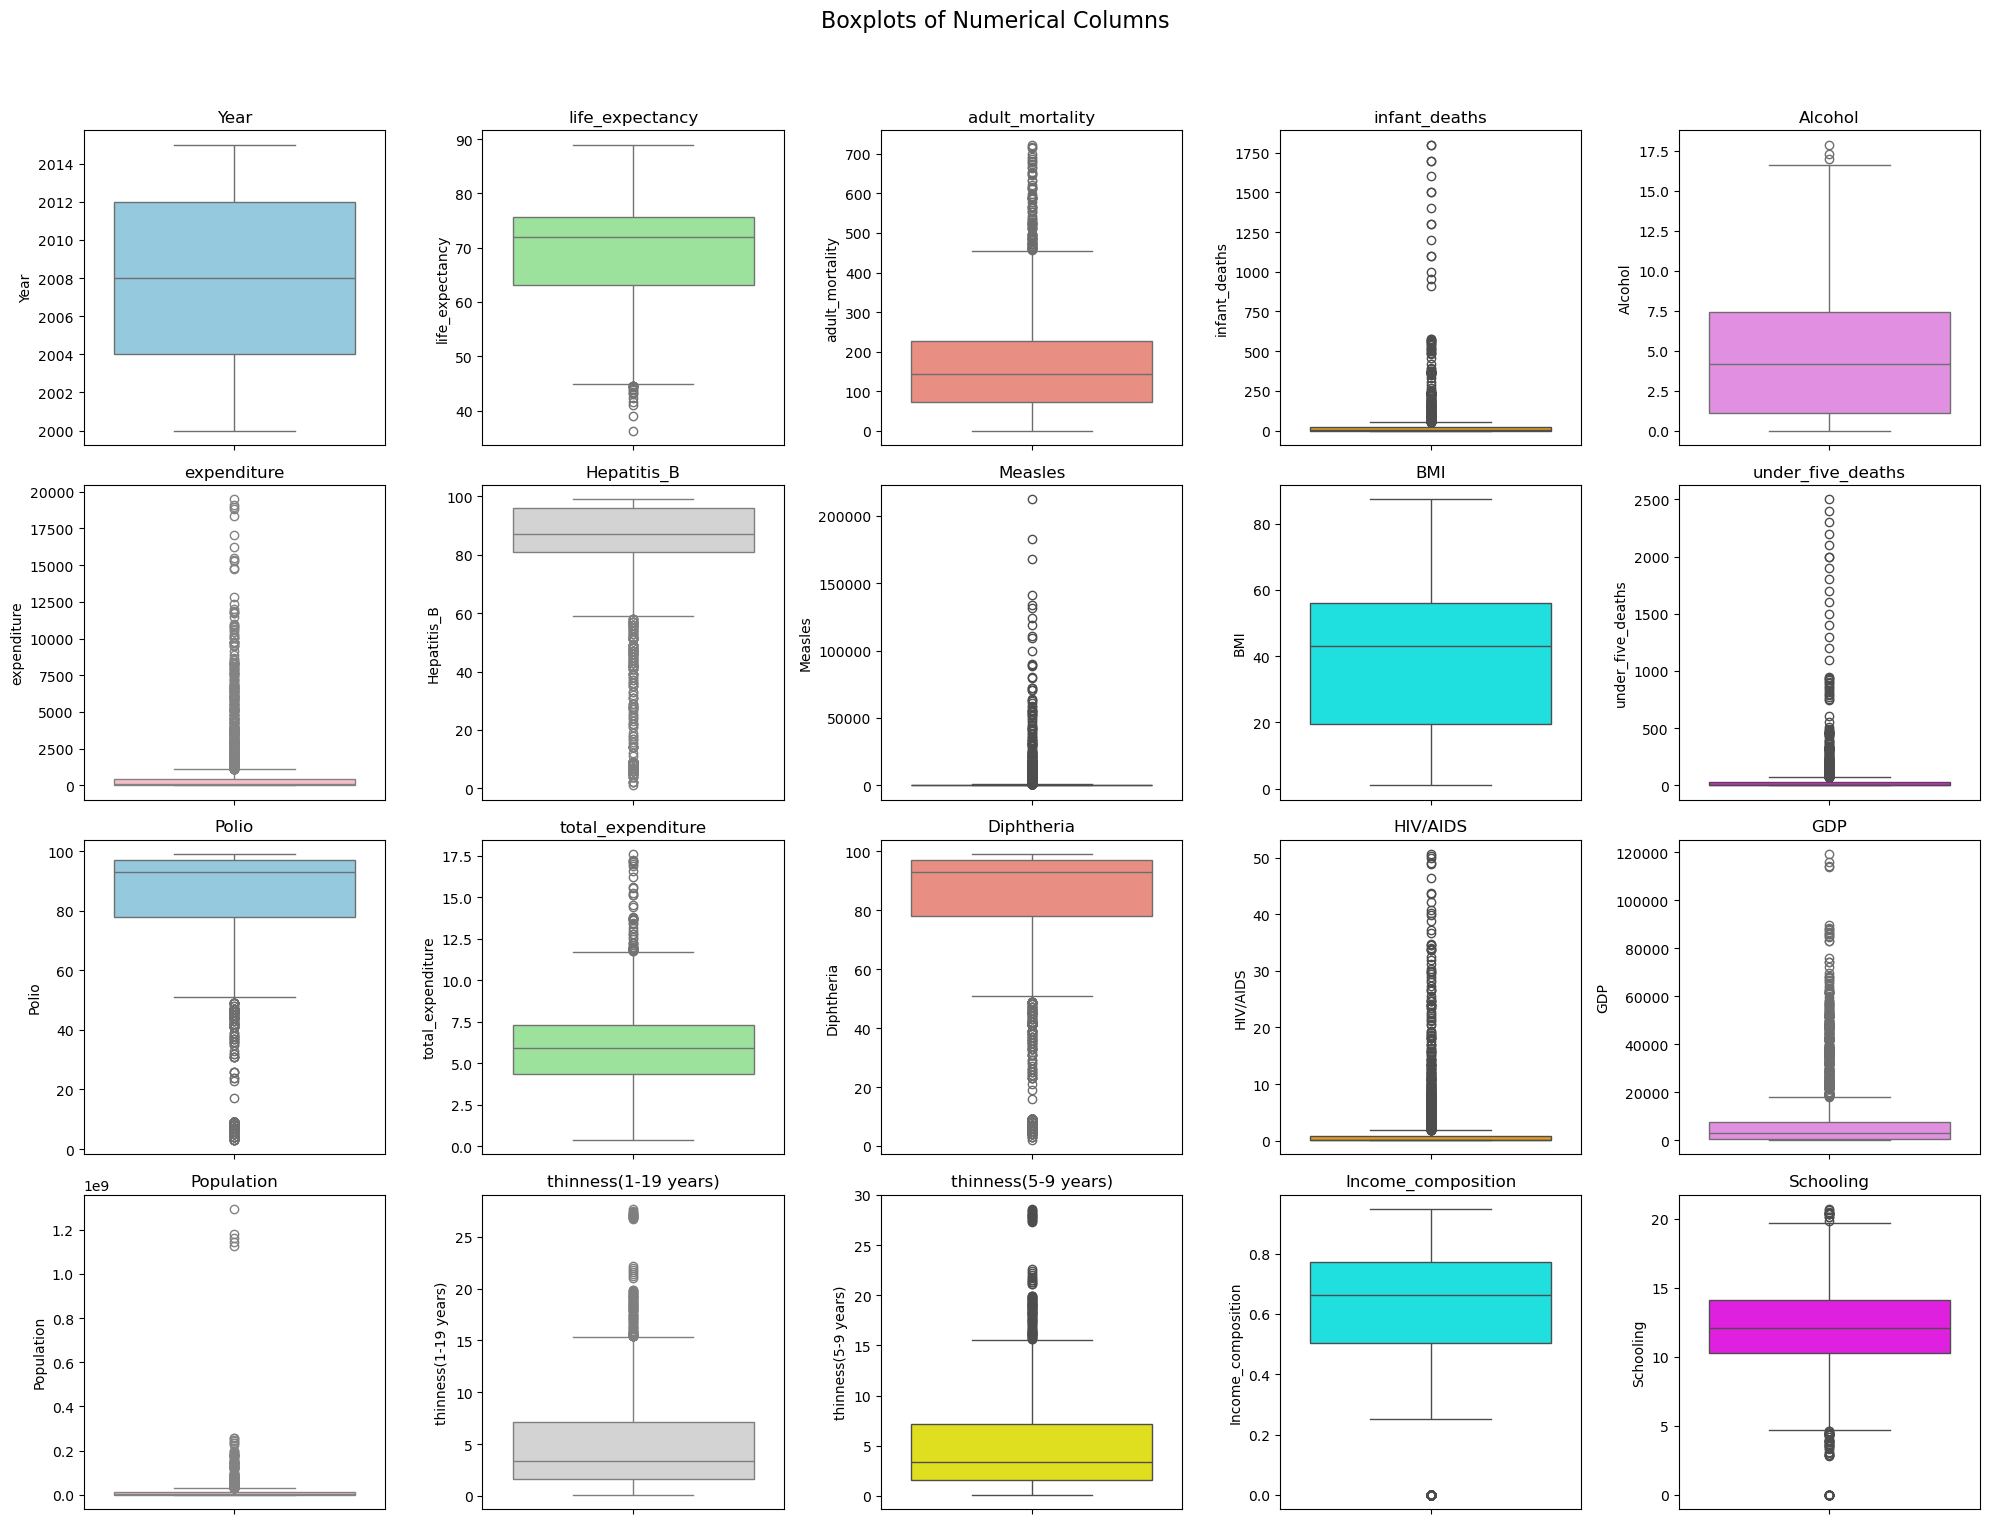

In [185]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Define a list of colors 
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'violet', 
          'lightpink', 'lightgrey', 'yellow', 'cyan', 'magenta']

# Create subplots
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)
axes = axes.flatten()

# Plot each boxplot with a different color
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color=colors[i % len(colors)])  # cycle colors
    axes[i].set_title(col)

# Remove unused axes
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [186]:
df.Country.value_counts()

Country
Afghanistan              16
Albania                  16
Algeria                  16
Angola                   16
Antigua and Barbuda      16
                         ..
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Tuvalu                    1
Name: count, Length: 193, dtype: int64

In [187]:
# Calculating the average life expectancy for each year
average_life_expectancy=df.groupby('Year')['life_expectancy'].mean().reset_index();
average_life_expectancy

,Year,life_expectancy
0,2000,66.750273
1,2001,67.128962
2,2002,67.351366
3,2003,67.433333
4,2004,67.646448
5,2005,68.209290
6,2006,68.667760
7,2007,69.036066
8,2008,69.427869
9,2009,69.938251


In [188]:
# Create the interactive line plot
import plotly.express as px

fig = px.line(
    average_life_expectancy,
    x='Year',
    y='life_expectancy',  # make sure this matches your dataframe exactly
    title='Average Life Expectancy over the Years',
    labels={'Year': 'Year', 'Life expectancy ': 'Life Expectancy (years)'},
    template='plotly_dark'
)
fig.show()

In [189]:
# Create the interactive scatter plot
fig = px.scatter(
    df,
    x='Population',
    y='life_expectancy',  
    hover_name='Country',
    # color='Status',     
    animation_frame='Year',
    title='Population vs Life Expectancy',
    labels={'Population': 'Population', 'Life expectancy ': 'Life Expectancy (years)'},
    template='plotly_dark'
)
fig.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_5944\592760563.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




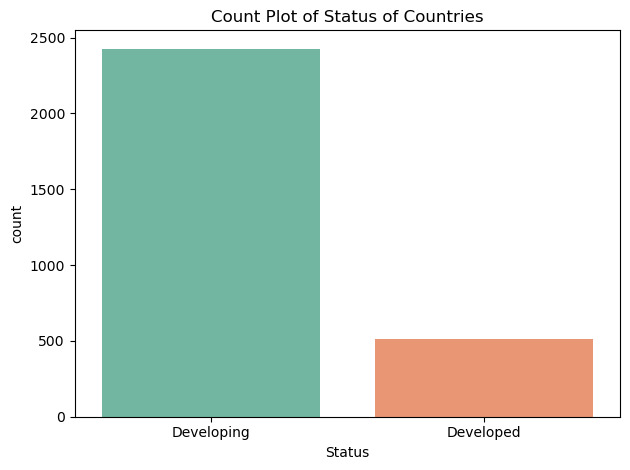

In [190]:
sns.countplot(x=df['Status'], palette='Set2')  # You can also try 'Set1', 'coolwarm', etc.
plt.title('Count Plot of Status of Countries')
plt.tight_layout()
plt.show()

In [191]:
# Creating histogram (bar chart)
life_expect_status = df.groupby('Status')['life_expectancy'].mean().reset_index()

fig = px.bar(
    life_expect_status,
    x='Status',
    y='life_expectancy',
    color='Status',
    text='life_expectancy',  # Show values on top of bars
    title='<b>Average Life Expectancy for Status of Country</b>',
    template='plotly_dark'
)
fig.update_layout(
    title=dict(x=0.5),
    uniformtext_minsize=10,
    uniformtext_mode='hide'
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

In [192]:
# Calculate the average life expectancy and average alcohol consumption for each year
average_data = df.groupby('Year').agg({
    'life_expectancy': 'mean',
    'Alcohol': 'mean'
}).reset_index()

In [193]:
# Create the interactive plot with dual y-axes
import plotly.graph_objects as go
fig = go.Figure()

# Add life expectancy trace
fig.add_trace(go.Scatter(
    x=average_data['Year'],
    y=average_data['life_expectancy'],
    mode='lines+markers',
    name='Life Expectancy',
    yaxis='y1',
    line=dict(color='blue', width=3)
))
# Add alcohol consumption trace
fig.add_trace(go.Scatter(
    x=average_data['Year'],
    y=average_data['Alcohol'],
    mode='lines+markers',
    name='Alcohol Consumption',
    yaxis='y2',
    line=dict(color='red', width=3)
))

# Update layout for dual y-axes
fig.update_layout(
    title='Life Expectancy and Alcohol Consumption over the Years',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Life Expectancy (years)', side='left'),
    yaxis2=dict(
        title='Alcohol Consumption (liters)',
        side='right',
        overlaying='y'
    ),
    template='plotly_dark'
)

# Show the plot
fig.show()

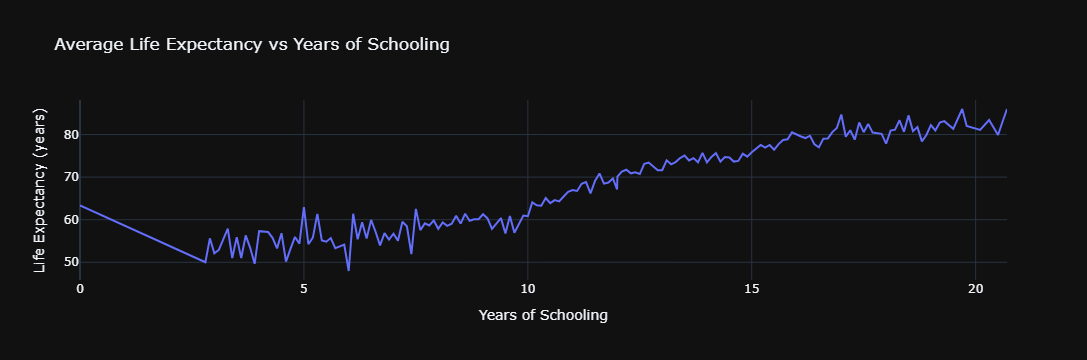

In [194]:
# Create the interactive line plot
aggregated_data = df.groupby('Schooling')['life_expectancy'].mean().reset_index();
fig = px.line(aggregated_data, x='Schooling', y='life_expectancy',
title='Average Life Expectancy vs Years of Schooling',
labels={'Schooling':'Years of Schooling', 'life_expectancy':'Life Expectancy (years)'},
template='plotly_dark')
fig.show()

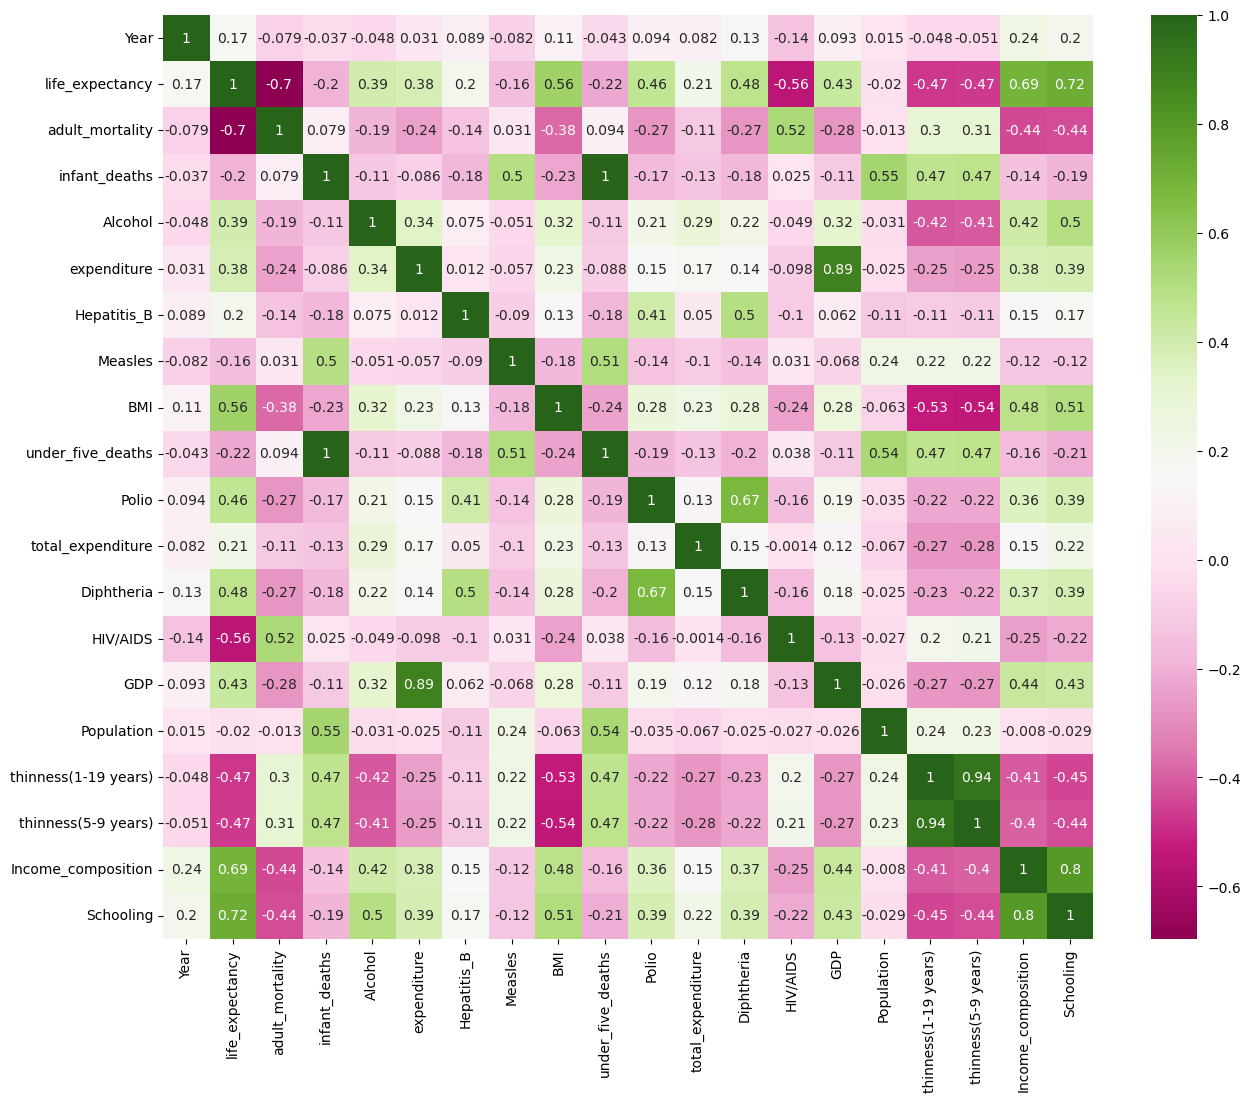

In [195]:
plt.figure(figsize=(15, 12))
sns.heatmap(df[numerical_cols].corr(), cmap='PiYG',
annot=True)
plt.show()

##### Data Preprocessing

In [207]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = df.select_dtypes(include = 'object').columns
for cols in cat_cols:
    df[cols] = le.fit_transform(df[cols])

In [208]:
x = df.drop(columns='life_expectancy');
y = df['life_expectancy'];

In [209]:
scaler = StandardScaler()
cols_to_scale = x.drop(columns='Status').columns

# for cols in cols_to_scale:
x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])

#### Model Building

In [239]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30);

In [240]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extra Trees Regressor': ExtraTreesRegressor(random_state=42),
    'GradientBoost Regressor': GradientBoostingRegressor(random_state=42),
    'XGB Regressor': XGBRegressor()
}

In [247]:
results = []

for model_name, model in models.items():
    # 1️⃣ Train the model
    model.fit(x_train, y_train)
    
    # 2️⃣ Predict on test set
    y_pred = model.predict(x_test)
    
    # 3️⃣ Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 4️⃣ Store results for this model
    results.append({
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

# Converting results to DataFrame
results_df = pd.DataFrame(results);
results_df

                     Model      RMSE       MAE        R2
0            Random Forest  2.037484  1.255802  0.956929
1    Extra Trees Regressor  1.868878  1.030961  0.963763
2  GradientBoost Regressor  2.321795  1.600959  0.944071
3            XGB Regressor  2.015130  1.260635  0.957869


##### Comparison of ML models

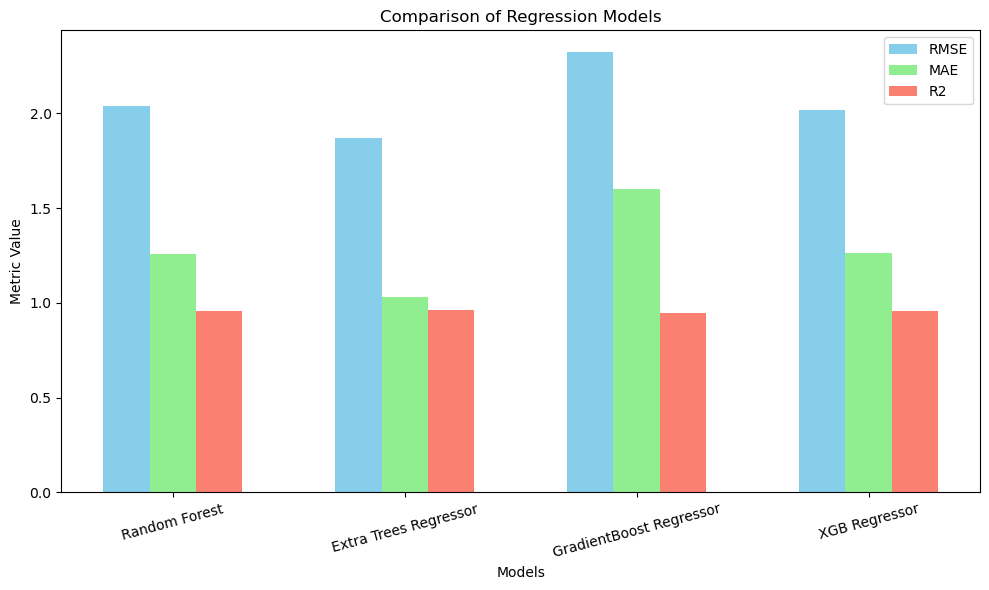

In [250]:
plt.figure(figsize=(10,6))
metrics = ['RMSE', 'MAE', 'R2']
colors = ['skyblue', 'lightgreen', 'salmon']
bar_width = 0.2
x = np.arange(len(results_df['Model']))
for i, metric in enumerate(metrics):
    plt.bar(x + i*bar_width, results_df[metric], width=bar_width, color=colors[i], label=metric)
plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.title('Comparison of Regression Models')
plt.xticks(x + bar_width, results_df['Model'], rotation=15)
plt.legend()
plt.tight_layout()
plt.show()